Unsupervised learning techniques are those that involve training with or analyzing unlabeled data. Dimensionality reduction, for instance, is an unsupervised learning task.

Other examples:

- **Clustering**: group similar instance together into clusters. Useful for data analysis, segmentation, recommender systems, serach engines, semi-supervised learning, and dimensionality reduction.

- **Anomaly Detection**: a predictor is trained to recognize 'normal' instances in order to detect abnormalities. Useful for defect detection and identifying new trends.

- **Density Estimation**: estimates the probability density function (PDF) of the random process that generated the dataset. Useful for anomaly detection, data analysis, and visualization.

Topics:

- Clustering
    - K-Means Algorithm
    - Image Segmentation
    - Preprocessing
    - Semi-Supervised Learning
    - DBSCAN Algorithm
    - Other Algorithms
- Gaussian Mixtures
    - Anomaly Detection
    - Bayesian Models
    - Other Algorithms

# Clustering

**Clustering** is the task of identifying similar instances and assigning them to clusters.

Some applications:

- **Customer segmentation**: clustering customers based on purchases and activity, and adapt products and marketing to each segment. Useful for recommender systems.
- **Data analysis**: clustering instances based on feature relationships. Useful for gaining early insights and separating the data.
- **Dimensionality reduction**: after clustering a dataset, each instance can be redefined according to its affinity with each cluster, reducing dimensionality to the (much lower) number of clusters while preserving most of the information.
- **Anomaly detection**: identifying instances with low cluster affinities to detect outliers.
- **Semi-supervised learning**: clustering a partially-labeled dataset, and then propagating the labels to like-instances for a subsequent supervised training stage.
- **Search engines**: clustering a collection of images, then returning the best-matching cluster when a reference image is provided.
- **Image segmentation**: clustering pixels according to color, then replacing each with its cluster's mean color. Useful for object and contour detection, tracking systems.

## K-Means Algorithm

The **K-Means** algorithm attempts to identify $k$ 'blobs' of like-data and determine the center of each.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs

# Sample blob data centers
blob_centers = np.array([
    [0.2, 2.3],
    [-1.5, 2.3],
    [-2.8, 1.8],
    [-2.8, 2.8],
    [-2.8, 1.3]
])

# Standard deviations for each blob
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

# Generate sample blobs 
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=47)

In [11]:
import matplotlib.pyplot as plt

# Helper function to plot clusters
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

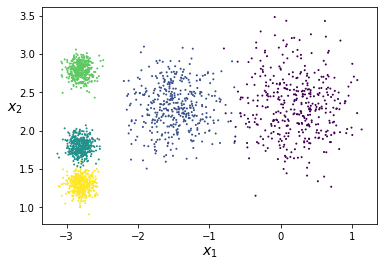

In [3]:
# Plot sample dataset, identifying each cluster with a color
plot_clusters(X, y)

In [13]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [5]:
# The training set labels are preserved
y_pred is kmeans.labels_

True

In [6]:
# Access the kmeans cluster centers
kmeans.cluster_centers_

array([[-2.79524351,  1.79985624],
       [ 0.21494229,  2.32682611],
       [-1.4684875 ,  2.31655447],
       [-2.80220997,  2.78658057],
       [-2.79611971,  1.29657896]])

In [7]:
# Predict new instances
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3])

In [8]:
# Transform measures the distance from each instance to the center of each cluster
kmeans.transform(X_new)

array([[2.80239965, 0.39117195, 1.50221911, 2.91051365, 2.88324238],
       [5.79869855, 2.80416864, 4.47968606, 5.85528389, 5.83864752],
       [1.21748522, 3.28466391, 1.67708925, 0.29097895, 1.71557874],
       [0.72947002, 3.21960295, 1.54245999, 0.34820873, 1.22056929]])

The K-means algorithm works by selecting instances at random to be used as centroids for each cluster, labeling the instances relative to the centroids, updating the chosen centroids, and repeating until the centroids converge to ideal locations.

Depending on the initial centroids, the algorithm may converge to a local optimum. This can be avoided if the cluster locations can be approximated during initial exploration, and the centroids initialized in the appropriate areas.

In [9]:
init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans_a = KMeans(n_clusters=5, init=init, n_init=1)
kmeans_a

KMeans(algorithm='auto', copy_x=True,
       init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       max_iter=300, n_clusters=5, n_init=1, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

Another method is to increase the number of initializations (n_init) to try a number of different random initializations and keep the best solution.

In [10]:
kmeans_b = KMeans(n_clusters=5, n_init=10)
kmeans_b

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

The performance of a K-means algorithm can be measured by its *inertia*, or the mean squared distance between each instance and the nearest centroid.

In [11]:
kmeans_a.fit(X)
kmeans_a.inertia_

218.83999258014802

In [12]:
kmeans_b.fit(X)
kmeans_b.inertia_

218.83999258014802

In [13]:
# The score is negative inertia so optimization will search for the highest value
kmeans_a.score(X)

-218.83999258014836

The K-means++ initialization algorithm involves a step to encourage separation between the random centroids.

*K-means++ algorithm*:

1. A centroid $\mathbf{c}^{(1)}$ is chosen uniformly at random.

2. A second centroid $\mathbf{c}^{(i)}$ is chosen as $\mathbf{x}^{(i)}$ with probability $D\bigl( \mathbf{x}^{(i)} \bigr)^2 / \sum_{j=1}^m D\bigl( \mathbf{x}^{(i)} \bigr)^2$, where $D(\mathbf{{x}^{(i)}})$ is the distance between $\mathbf{x}^{(i)}$ and the nearest known centroid.

3. Repeat until $k$ centroids have been chosen.

Another form of the K-means algorithm is the mini-batch method, which uses a subset of the data to iteratively train the predictor. This is much faster at the cost of higher inertia, and can be used for online training.

In [14]:
from sklearn.cluster import MiniBatchKMeans

mb_kmeans = MiniBatchKMeans(n_clusters=5)
mb_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

Determining an optimal number of clusters can be handled programmatically by calculating the *silhouette score*, or the mean of the silhouette coefficient over all instances.

An instance's silhouette coefficient is calculated as $\frac{b-a}{max(a, b)}$, where $a$ is the mean distance to other instances in the same cluster, and $b$ is the mean distance to the instances in the next nearest cluster. This value varies between -1 and +1.

- A coefficient near +1 indicates it is well inside its own cluster and far from others.
- A coefficient near 0 indicates it is near a cluster boundary.
- A coefficient near -1 indicates a high likelihood that it's been assigned to the wrong cluster.

In [15]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.6490930572066652

In [16]:
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(X)
    print(f'k = {k} score: {silhouette_score(X, kmeans.labels_)}')

k = 2 score: 0.6015047738561801
k = 3 score: 0.5730356596035047
k = 4 score: 0.6805301055233608
k = 5 score: 0.6490930572066652
k = 6 score: 0.5930588320189178
k = 7 score: 0.5949327873768432


## Image Segmentation

**Image Segmentation** is the process of partitioning an image into multiple segments through various methods.

- **Semantic segmentation**: segmenting pixels that are part of the same kind of object, such as a 'cars' segment for all recognized cars.
- **Instance segmentation**: segmenting pixels that are part of the same unique object, such as a 'car_n' segment for each recognized car.
- **Color segmentation**: segmenting pixels of similar colors.

In [17]:
from matplotlib.image import imread
image = imread('media/bird.png')
image.shape

(356, 424, 3)

In [18]:
X = image.reshape(-1, 3)

segmented = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters).fit(X)
    segmented_i = kmeans.cluster_centers_[kmeans.labels_]
    segmented.append(segmented_i.reshape(image.shape))

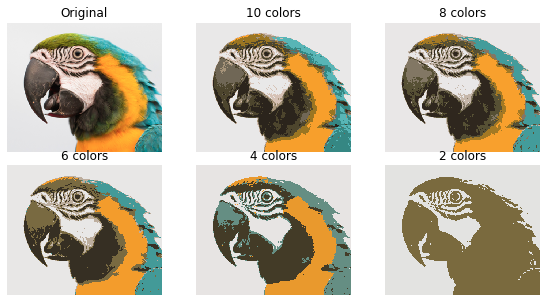

In [19]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

for i, n_clusters in enumerate(n_colors):
    plt.subplot(232 + i)
    plt.imshow(segmented[i])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

## Preprocessing

Clustering can be useful for dimensionality reduction as a preprocessing step before using a supervised learning algorithm.

In [14]:
# Use MNIST dataset for demonstration
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [5]:
# Baseline score using a configured logistic regressor
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
log_reg.score(X_test, y_test)

0.9555555555555556

In [30]:
# Add KMeans to the pipeline as a preprocessor
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50)),
    ('log_reg', LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000))
])

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=5000,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [31]:
pipeline.score(X_test, y_test)

0.9688888888888889

In [26]:
# Grid search to find the best number of clusters
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(50, 150))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=None, tol=0.0001,
                                               verbose=0)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                    

In [27]:
grid_clf.best_params_

{'kmeans__n_clusters': 135}

In [28]:
grid_clf.score(X_test, y_test)

0.9777777777777777

## Semi-Supervised Learning

If a portion of data is labeled, clustering can be used to group similar instances before performing supervised training.

In [8]:
# Baseline model with only 50 labeled instances
n_labeled = 50
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
log_reg.score(X_test, y_test)

0.8

In [16]:
# Add a KMeans stage with 50 clusters
k = 50
kmeans = KMeans(n_clusters=k)

# Assign a segment of the data to represent their clusters
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

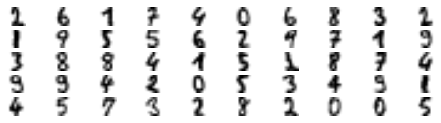

In [18]:
# Visualize the sample
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

In [21]:
# Manually label the instances
y_representative_digits = np.array([
    2, 6, 1, 7, 4, 0, 6, 8, 3, 2,
    1, 9, 5, 5, 6, 2, 9, 7, 1, 9,
    3, 8, 8, 4, 1, 5, 1, 8, 7, 6,
    9, 9, 4, 2, 0, 5, 3, 4, 9, 1,
    4, 5, 7, 3, 2, 8, 2, 0, 0, 5
])

In [22]:
# Compare the same model using the clustered data
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8888888888888888

In [23]:
# Propagate the labels to each instance in the same cluster
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [24]:
# Train the model once again
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9311111111111111

In [40]:
# Narrow the labeling threshold to instances reasonably within the cluster borders
percentile_closest = 80

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [41]:
# Train again
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9333333333333333

To further improve the model, active learning may be applied to improve the labels. This can be done by identifying the instances with the most uncertainty and requesting a manual label. This can be repeated until the improvement rate declines to the point that the labeling overhead is no longer worth it.

## DBSCAN

The **DBSCAN** algorithm identifies clusters that are in arbitrary shapes by defining them as continuous regions of high density.

- For each instance, the algorithm determines the number of instances within some distance $\varepsilon$, defining the instance's $\varepsilon$*-neighborhood*.
- If there are at least the minimum number of samples in an instance's $\varepsilon$-neighborhood, that instance is considered a *core instance*.
- All instances in a core instance's neighborhood will belong to othe same cluster. If other core instances are in the neighborhood, the cluster will include their neighborhoods as well.
- If an instance has no core instance in its neighborhood it is considered an anomaly.

The DBSCAN algorithm works best if all the clusters are dense and separated by low-density regions.

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

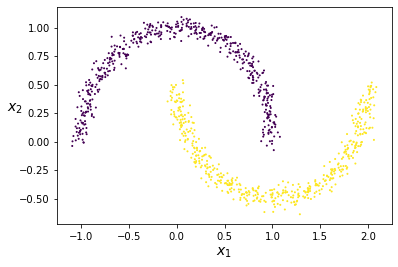

In [7]:
# Visualize the data
plot_clusters(X, y)

In [17]:
# Access all of the instance labels
dbscan.labels_[:5]

array([ 0, -1,  0,  1,  2], dtype=int64)

In [18]:
# Check the number of clusters
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

Note: Anomalies are labeled -1.

In [9]:
# Access the core instance indices
dbscan.core_sample_indices_[:5]

array([0, 2, 3, 4, 5], dtype=int64)

In [10]:
# Access the core instance locations
dbscan.components_[:5]

array([[ 1.36990864, -0.41144787],
       [ 1.26803934, -0.48723309],
       [-0.66337195,  0.68248847],
       [ 1.91795604,  0.06351659],
       [ 1.70214288, -0.24843915]])

In [19]:
# Widen the neighborhood size to try and reduce the number of clusters
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [20]:
np.unique(dbscan.labels_)

array([0, 1], dtype=int64)

In [21]:
# Use the clusters to train a classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [24]:
# Predict some new instances
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [23]:
# Get the probability of each cluster for each instance
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.18, 0.82],
       [1.  , 0.  ]])

In [26]:
# Get distances and indices of each instance's nearest neighbor
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)

# Classify each instance with distance > 0.2 as an anomaly
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1

y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

## Other Algorithms

- **Agglomerative clustering**: a hierarchy of clusters in the form of a binary tree, where nearest pairs of clusters are clustered at each branch. Scales well to large numbers of instances or clusters, useful for data exploration.
- **BIRCH**: or Balanced Iterative Reducing and Clustering using Hierarchies, builds a tree structure with the minimum information needed to make predictions on new instances. Very performant for large datasets without an excessive number of features (<20).
- **Mean-Shift**: each instance is given a uniform neighborhood with a supplied radius around it. The mean-shift algorithm calculates the mean of all instances in the instance's neighborhood, shifts the center to the mean, and repeats until a local density maximum is found. Neighborhoods that settle in the same areas are assigned to the same cluster. Only one hyperparameter, but doesn't scale well for large datasets.
- **Affinity propagation**: relies on a voting system so instances may vote for similar instances to represent them. When the algorithm converges, each cluster is made up of a representative and its voters. Useful for detecting a variety of clusters of different sizes, but doesn't scale well for large datasets.
- **Spectral clustering**: uses a similarity matrix to reduce dimensionality, then uses another clustering algorithm to cluster the new space. Useful for capturing complex structures and cutting graphs, but does not work well for large datasets or very different cluster sizes.

# Gaussian Mixtures

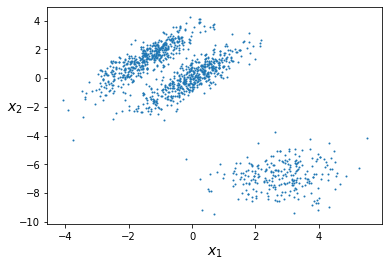

In [14]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)))
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

plot_clusters(X)

In [15]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [16]:
gm.weights_

array([0.2       , 0.40249625, 0.39750375])

In [17]:
gm.means_

array([[ 2.77752843, -6.811486  ],
       [-0.01019429,  0.02694441],
       [-1.45730978,  1.37460961]])

In [18]:
gm.covariances_

array([[[0.94939468, 0.15370095],
        [0.15370095, 1.02189783]],

       [[0.67745176, 0.7934939 ],
        [0.7934939 , 1.27606287]],

       [[0.64701974, 0.78997789],
        [0.78997789, 1.27250523]]])

In [19]:
gm.converged_, gm.n_iter_

(True, 3)

In [20]:
gm.predict(X)

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [22]:
gm.predict_proba(X)

array([[5.99454418e-015, 9.99997479e-001, 2.52118954e-006],
       [1.61747042e-014, 9.99999976e-001, 2.38803511e-008],
       [4.20817215e-015, 1.00000000e+000, 2.46806365e-011],
       ...,
       [1.00000000e+000, 2.34064952e-071, 8.22636485e-139],
       [1.00000000e+000, 2.08530795e-072, 2.47763554e-140],
       [1.00000000e+000, 2.18848675e-044, 5.52293750e-096]])

In [23]:
X_new, y_new = gm.sample(6)
X_new

array([[ 0.49726841, -8.69798038],
       [-0.62803353, -0.64787458],
       [-0.19901471, -0.06587529],
       [ 0.55713416,  1.22262874],
       [-1.23073683,  0.96835071],
       [-1.10237871,  0.82628731]])

In [24]:
y_new

array([0, 1, 1, 1, 2, 2])

In [25]:
gm.score_samples(X)

array([-2.29312963, -2.0258584 , -2.99825453, ..., -3.61854384,
       -3.70581961, -6.26980957])